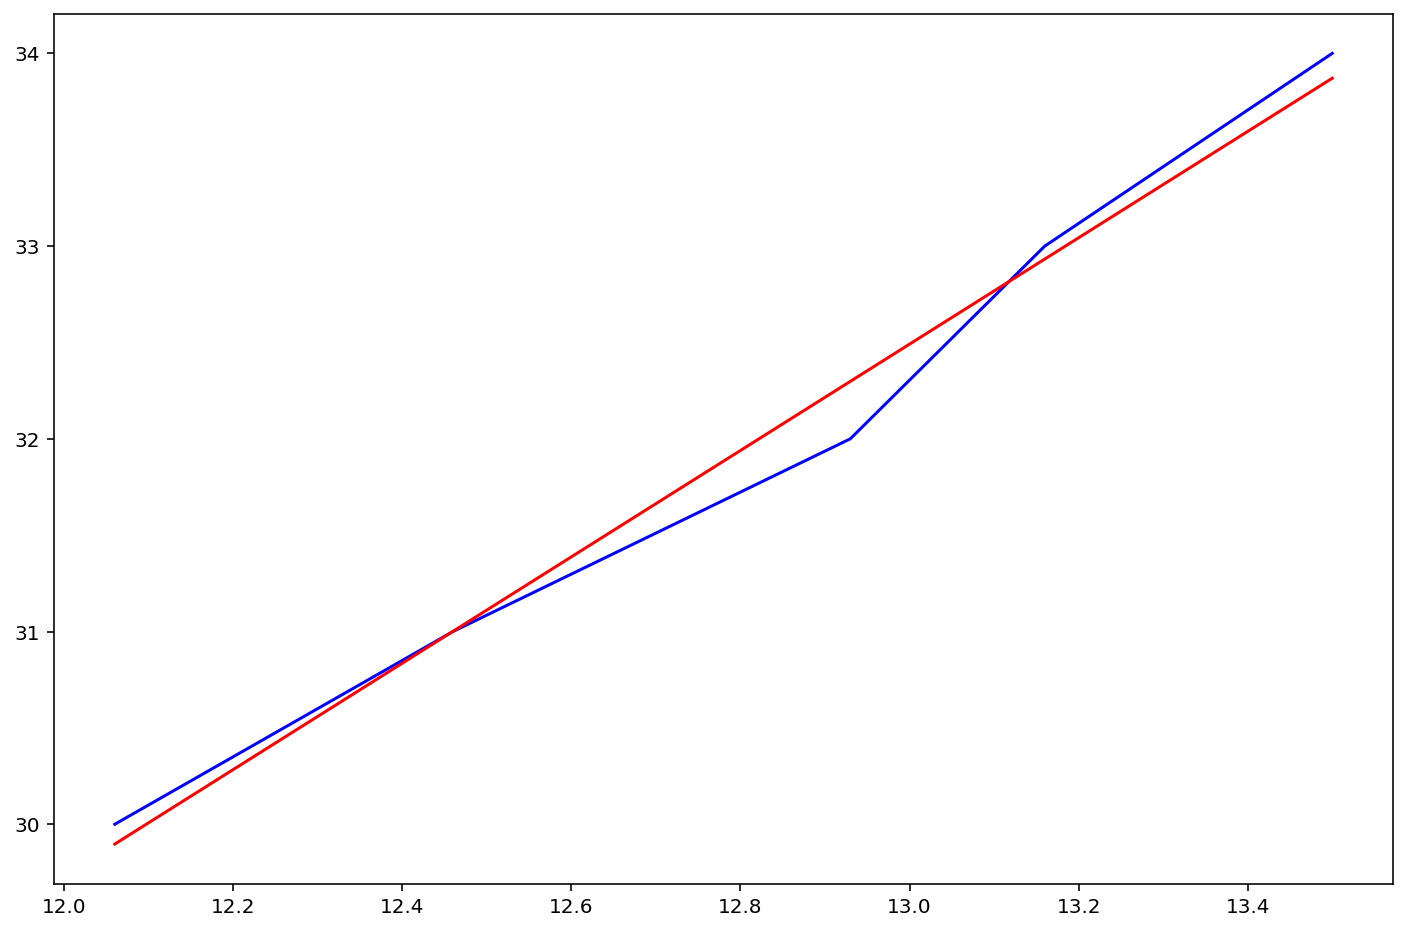

In [28]:

import matplotlib.pyplot as plt

# Use the following only if you are on a high definition device
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

import pandas as pd
from scipy.optimize import curve_fit
import numpy as np

data_str = '''fully_delayed_repeaters_count,pulse_length_in_seconds
34,13.50
33,13.16
32,12.93
31,12.46
30,12.06'''
lines_list = data_str.split('\n')
values_list = lines_list[1:]
df = pd.DataFrame.from_records([r.split(',') for r in values_list], columns=lines_list[0].split(','))

# Format the data
for column_name in df.columns:
    df[column_name] = pd.to_numeric(df[column_name])

# Fit the curve
def func(x, a, b):

    return a*x + b
repeater_data = np.array(object=df.fully_delayed_repeaters_count.tolist())
pulse_data = np.array(object=df.pulse_length_in_seconds.tolist())
popt, pcov = curve_fit(func, ydata=repeater_data, xdata=pulse_data)

# Plot the cumulative data
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, autoscale_on=True)
line_2d_obj = plt.plot(pulse_data, repeater_data, 'b-', label='timed data')

# Plot the fitted curve
def get_repeater_count(pulse_length):
    '''Get the number of fully delayed repeaters given the pulse length in seconds'''
#     print('{}*{} + {}'.format(popt[0], pulse_length, popt[1]))

    return (popt[0] * pulse_length) + popt[1]
label_str = 'fit: rc = %3.1f*pl + %3.1f' % tuple(popt)
line_2d_obj = plt.plot(pulse_data, get_repeater_count(pulse_data), 'r-', label=label_str)

In [29]:

print(label_str)
get_repeater_count(10.0)

fit: rc = 2.8*pl + -3.4


24.212352078129303